In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
#HANDLE MISSING VALUES

df["Income"]= df["Income"].fillna(df["Income"].median())

In [5]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [6]:
# FEATURE ENGINEERING

#Age 
df["Age"]= 2026- df["Year_Birth"]



In [7]:
#Customer joining date

df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"], dayfirst=True)
reference_date=df["Dt_Customer"].max()

df["Customer_Tenure_Days"]= (reference_date - df["Dt_Customer"]).dt.days


In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days'],
      dtype='object')

In [9]:
#Spending
df["Total_Spending"]= df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +df["MntFishProducts"] + df["MntSweetProducts"]+ df["MntGoldProds"]

In [10]:
# Total children

df["Total_childred"]= df["Kidhome"] + df["Teenhome"]

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_childred
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [12]:
#Education
df["Education"].value_counts()

#Undergraduate, graduate, Post-graduate
df["Education"]= df["Education"].replace(
    {  "2n Cycle":"Undergraduate", "Basic":"Undergraduate",
       "Graduation": "Graduate",
       "Master": "Postgraduate", "PhD": "Postgraduate"
        
    }
)

'''
Education
Graduate         1127
Postgraduate      856
Undergraduate     257
'''

'\nEducation\nGraduate         1127\nPostgraduate      856\nUndergraduate     257\n'

In [13]:
# Maritial Status
df["Marital_Status"].value_counts()

df["Living_With"]= df["Marital_Status"].replace(
    {  "Together": "Partner", "Married": "Partner",
       "Single":"Alone", "Divorced": "Alone", "Widow":"Alone",
       "Absurd":"Alone", "YOLO": "Alone"
        
    }
)

'''
Living_With
Partner    1444
Alone       796
'''

'\nLiving_With\nPartner    1444\nAlone       796\n'

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_childred,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [15]:
cols= ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome","Dt_Customer"]
spending_cols= ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts", "MntGoldProds"]

cols_to_drop= cols + spending_cols
df_cleaned= df.drop(columns= cols_to_drop)

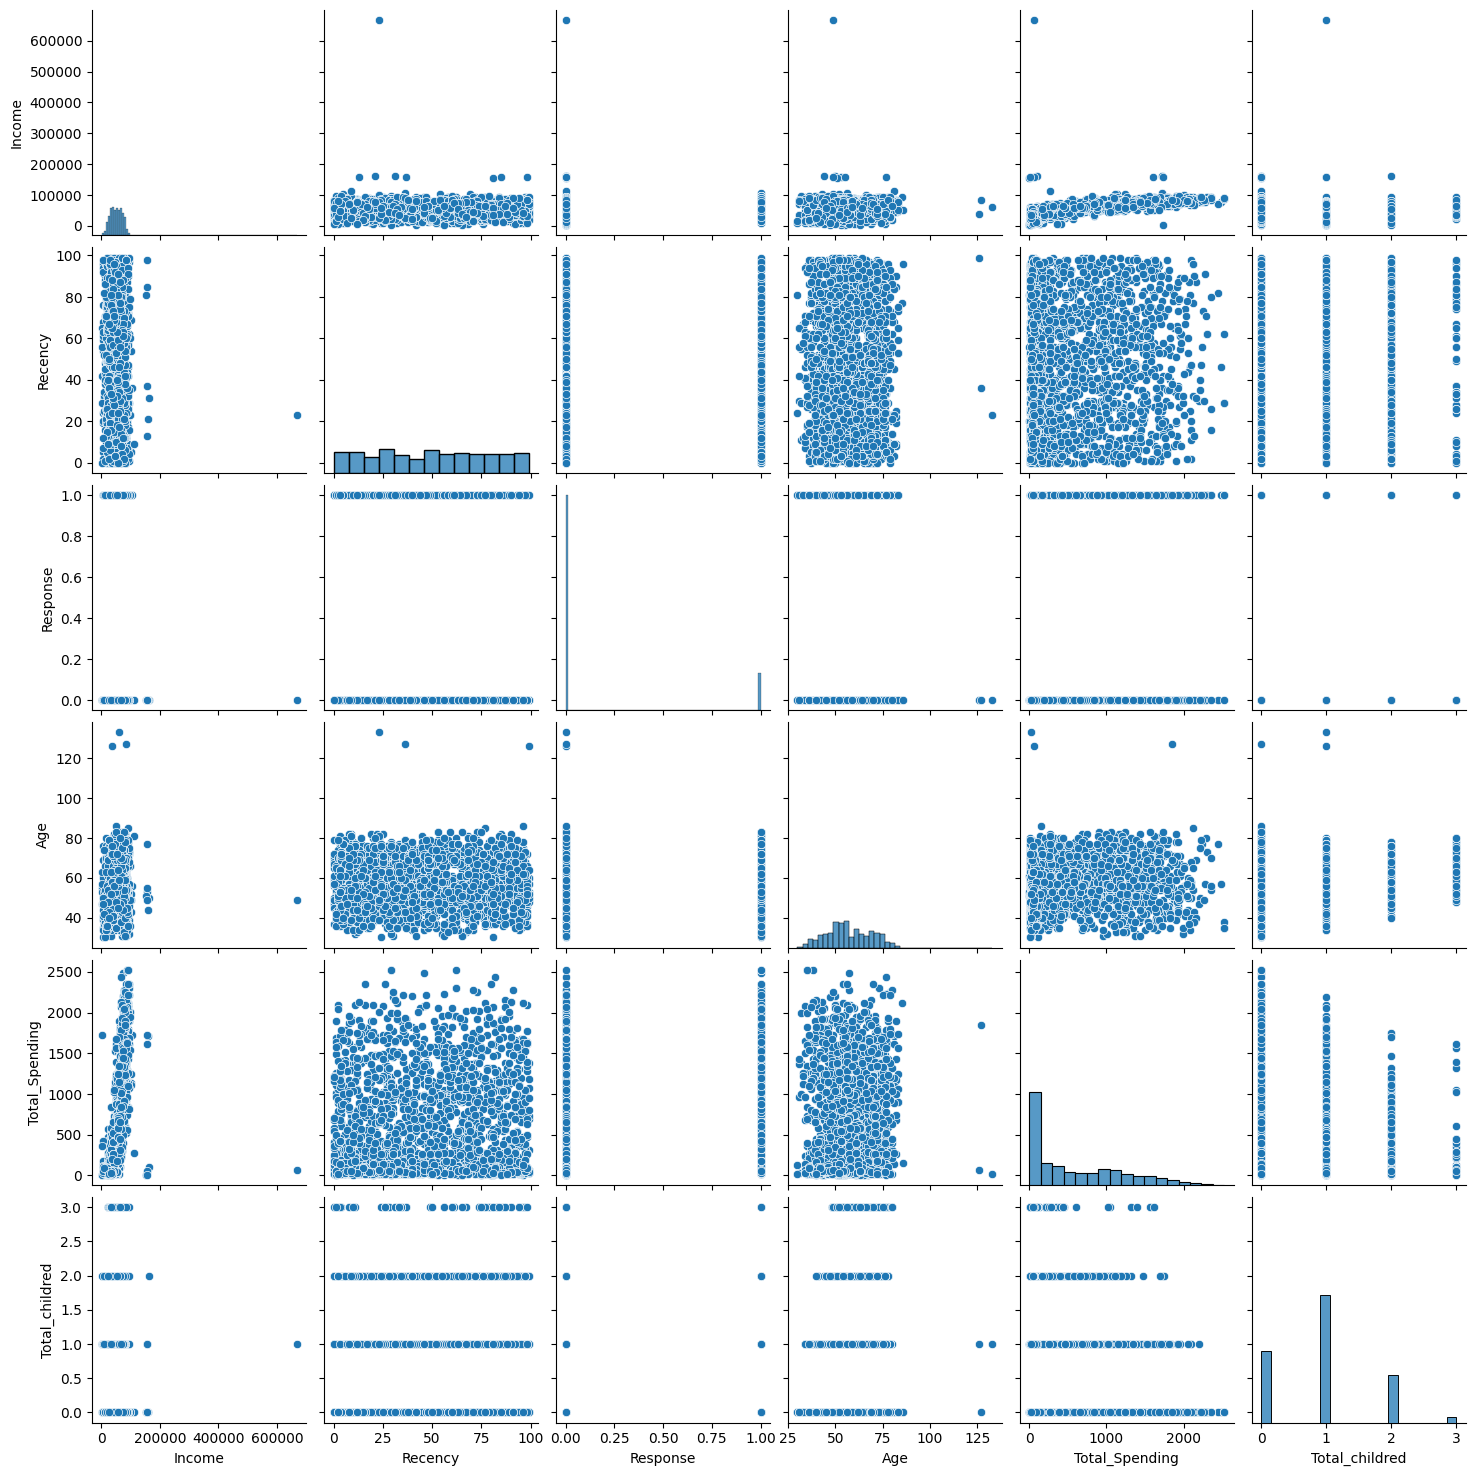

In [16]:
cols1=["Income","Recency", "Response", "Age","Total_Spending","Total_childred"]

# relative plots of some features- pair plots
sns.pairplot(df_cleaned[cols1])

In [17]:
# REMOVE OUTLIER
print("data size with outliers:", len(df_cleaned))

df_cleaned=df_cleaned[df_cleaned["Age"]<90]
df_cleaned= df_cleaned[df_cleaned["Income"]<600_000]

print("data size without outliers:", len(df_cleaned))

data size with outliers: 2240
data size without outliers: 2236


In [18]:
# HEAT_MAP
corr= df_cleaned.corr(numeric_only=True)

<Axes: >

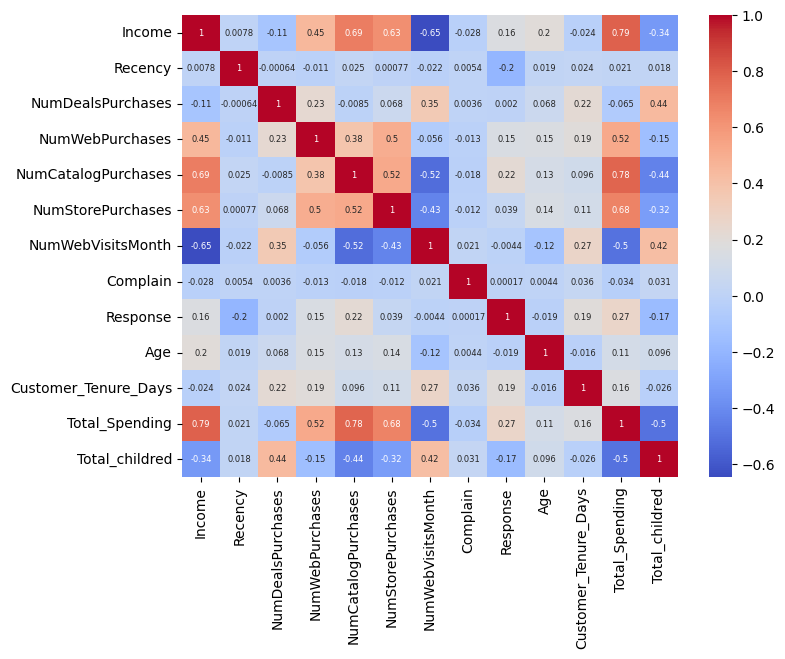

In [19]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    annot_kws={"size":6}
)  

In [20]:
#ENCODING
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe= OneHotEncoder()

cat_cols=["Education","Living_With"]
enc_cols= ohe.fit_transform(df_cleaned[cat_cols])

In [22]:
enc_df= pd.DataFrame(enc_cols.toarray(), columns= ohe.get_feature_names_out(cat_cols), index=df_cleaned.index)

In [23]:
enc_df.head()

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [24]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols), enc_df], axis=1)

In [25]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_childred,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


In [26]:
# SCALING
scaler=StandardScaler()
X= df_encoded
x_scaled=scaler.fit_transform(X)

In [27]:
#VISUALIZE
x_scaled.shape

(2236, 18)

In [28]:
#2D
from sklearn.decomposition import PCA
pca= PCA(n_components=2) 
X_pca= pca.fit_transform(x_scaled)

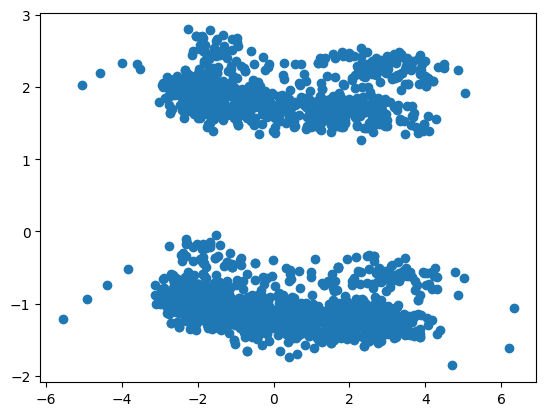

In [29]:
#plot 2d
plt.scatter(X_pca[:,0], X_pca[:,1])

In [30]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454])

In [31]:
#3D
from sklearn.decomposition import PCA
pca1= PCA(n_components=3) 
X_pca1= pca1.fit_transform(x_scaled)


array([0.23163158, 0.11385454, 0.10405815])

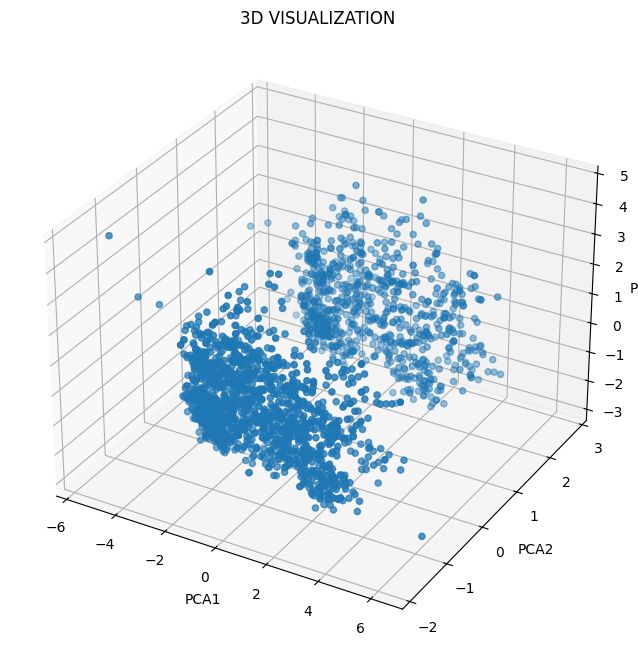

In [32]:
#3D visualization
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(X_pca1[:,0], X_pca1[:,1], X_pca1[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D VISUALIZATION")

pca1.explained_variance_ratio_

In [33]:
# ANALYZE K value
# 1. ELBOW METHOD

from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit_predict(X_pca1)
    wcss.append(kmeans.inertia_)

In [34]:
knee= KneeLocator(range(1,11), wcss, curve= "convex", direction="decreasing")
optimal_k= knee.elbow

In [35]:
optimal_k   #best k

np.int64(4)

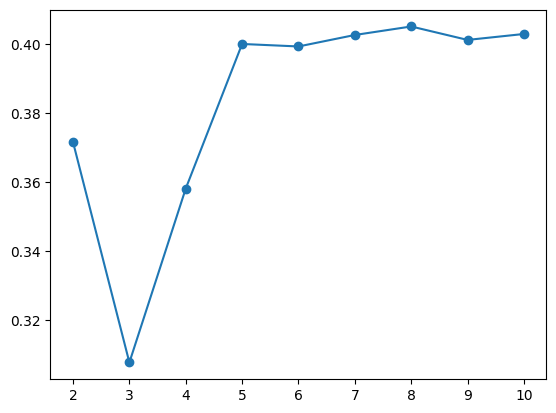

In [36]:
# 2. SILHOUTTE SCORE
from sklearn.metrics import silhouette_score
scores=[]

for k in range(2,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X_pca1)
    score= silhouette_score(X_pca1,labels)
    scores.append(score)

plt.plot(range(2,11),scores,marker='o')
    


array([0.23163158, 0.11385454, 0.10405815])

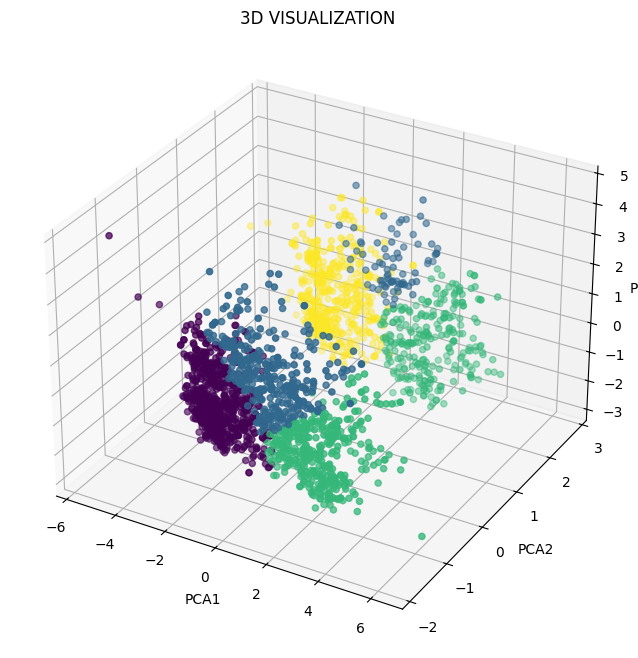

In [37]:
#CLUSTERING 
kmeans= KMeans(n_clusters=4, random_state=42)
labels_kmeans= kmeans.fit_predict(X_pca1)

#3D visualization
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(X_pca1[:,0], X_pca1[:,1], X_pca1[:,2], c= labels_kmeans)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D VISUALIZATION")

pca1.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

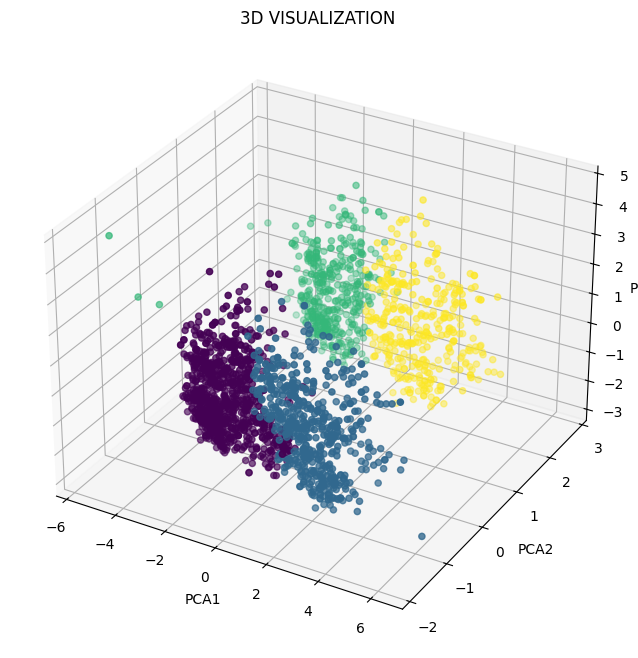

In [38]:
# AGGLOMERATIVE CLUSTERING
from sklearn.cluster import AgglomerativeClustering

agg_clf= AgglomerativeClustering(n_clusters= 4, linkage= "ward")
labels_agglo= agg_clf.fit_predict(X_pca1)

fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(X_pca1[:,0], X_pca1[:,1], X_pca1[:,2], c= labels_agglo)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D VISUALIZATION")

pca1.explained_variance_ratio_

# CHARACTERIZATION OF CLUSTERS


In [39]:

X["cluster"]= labels_agglo

X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_childred,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

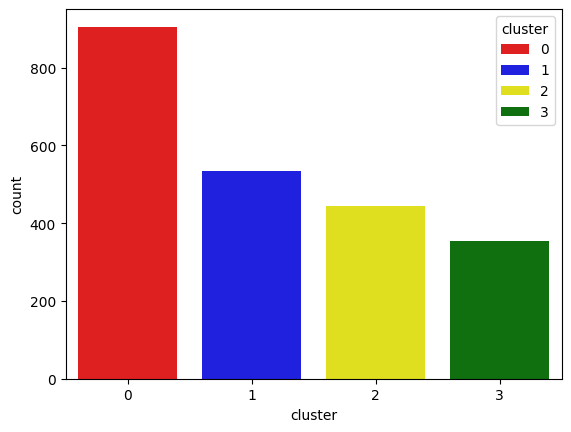

In [43]:
pal= ["red", "blue","yellow","green"]

sns.countplot(x= X["cluster"], palette=pal,hue=X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

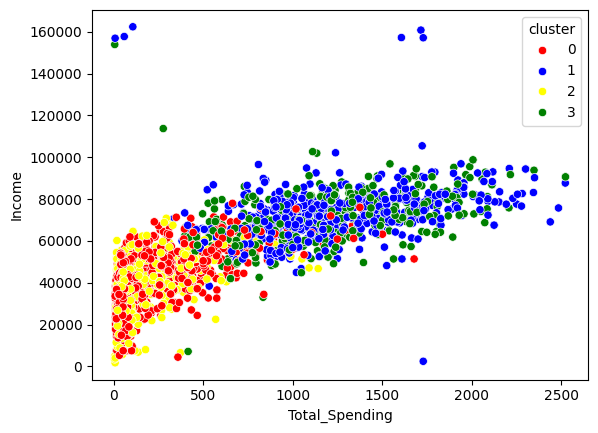

In [44]:
sns.scatterplot(x= X["Total_Spending"], y= X["Income"], hue= X["cluster"], palette= pal )

In [42]:
#cluster summary
cluster_summary= X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         